<a href="https://colab.research.google.com/github/EvGdk/Machine-Learning-HSE/blob/master/Yargy_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipymarkup==0.5.0 
!pip install yargy

     |████████████████████████████████| 51kB 2.2MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 7.1MB 8.8MB/s 


In [0]:
from ipymarkup import show_box_markup
from ipymarkup.palette import palette, RED, GREEN
from ipymarkup import show_markup
from yargy.interpretation import fact, attribute
from yargy.pipelines import morph_pipeline
from IPython.display import display
from yargy.predicates import (
    eq, in_, dictionary,
    type, gram, normalized)
from yargy import Parser, rule, and_, or_

In [51]:
from google.colab import files
files.upload()

Saving RUSSIAN UNITED.txt to RUSSIAN UNITED.txt


{'RUSSIAN UNITED.txt': b'\xd0\x94\xd0\xb5\xd0\xbb\xd0\xb8\xd1\x82\xd1\x8c\xd1\x81\xd1\x8f \xd1\x81 \xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xb8\xd0\xbc\xd0\xb8 \xd1\x81\xd0\xb2\xd0\xbe\xd0\xb8\xd0\xbc\xd0\xb8 \xd0\xb2\xd0\xbf\xd0\xb5\xd1\x87\xd0\xb0\xd1\x82\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xbd\xd0\xb8\xd1\x8f\xd0\xbc\xd0\xb8 \xd0\xbe\xd0\xb1 \xd0\xbe\xd1\x82\xd0\xb4\xd1\x8b\xd1\x85\xd0\xb5;\n\xd0\x9e\xd0\xb1\xd1\x89\xd0\xb0\xd1\x82\xd1\x8c\xd1\x81\xd1\x8f \xd0\xb8 \xd0\xb7\xd0\xb0\xd0\xb2\xd0\xbe\xd0\xb4\xd0\xb8\xd1\x82\xd1\x8c \xd0\xb4\xd1\x80\xd1\x83\xd0\xb7\xd0\xb5\xd0\xb9 \xd1\x81\xd1\x80\xd0\xb5\xd0\xb4\xd0\xb8 \xd1\x82\xd1\x83\xd1\x80\xd0\xb8\xd1\x81\xd1\x82\xd0\xbe\xd0\xb2;\n\xd0\x9e\xd0\xb1\xd1\x80\xd0\xb5\xd1\x81\xd1\x82\xd0\xb8 \xd0\xbf\xd0\xbe\xd0\xbf\xd1\x83\xd0\xbb\xd1\x8f\xd1\x80\xd0\xbd\xd0\xbe\xd1\x81\xd1\x82\xd1\x8c \xd0\xb2 \xd0\xbd\xd0\xb0\xd1\x88\xd0\xb5\xd0\xbc \xd1\x81\xd0\xbe\xd0\xbe\xd0\xb1\xd1\x89\xd0\xb5\xd1\x81\xd1\x82\xd0\xb2\xd0\xb5.\n\xd0\x9e\xd1\x82\xd0\xb2\xd0\xb

In [0]:
file = open("RUSSIAN UNITED.txt", "r")

In [0]:
text=file.read()

In [0]:
Measure = fact(
    "Measure", ["amount", "currency"]
)

CURRENCY = morph_pipeline(['доллар', '$', 'рубль','цент','дирхам','евро', 'копейка']).interpretation(Measure.currency)
INT = rule(type('INT'))
FLOAT = rule(INT, in_(',.'), INT)
DIGIT = or_(INT, FLOAT)

RANGE = rule(eq('от'), DIGIT, eq('до'), DIGIT)
RANGE2 = rule(DIGIT, in_('-,'), DIGIT)
VARIANCE = rule(DIGIT, eq('или'), DIGIT)


AMOUNT = rule(in_('выше около примерно более менее где-то').optional(), 
              or_(DIGIT,VARIANCE,RANGE2, RANGE)).interpretation(Measure.amount)



measure = rule(AMOUNT, CURRENCY).interpretation(Measure)
parser = Parser(measure)


In [0]:
matches = list(parser.findall(text))
spans = [_.span for _ in matches] 
#show_markup(text, spans)

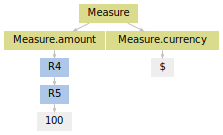

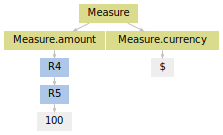

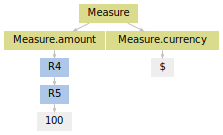

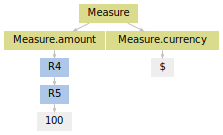

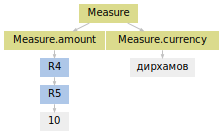

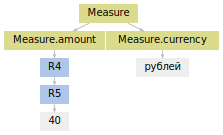

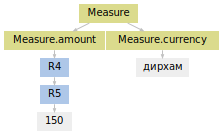

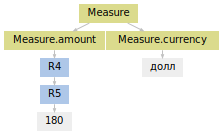

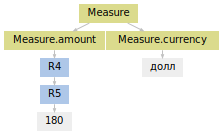

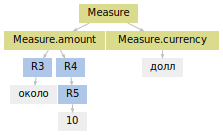

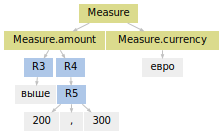

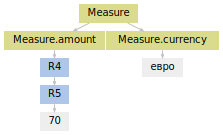

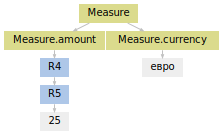

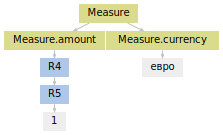

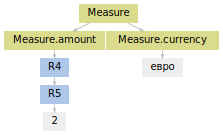

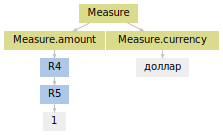

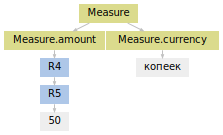

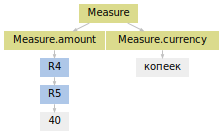

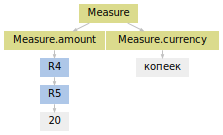

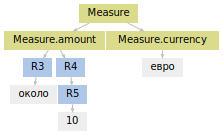

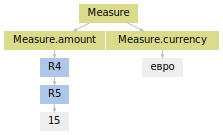

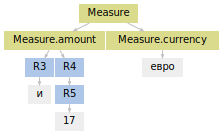

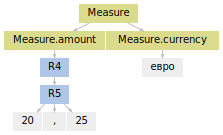

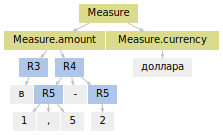

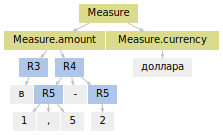

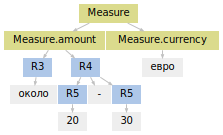

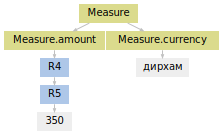

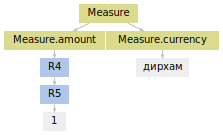

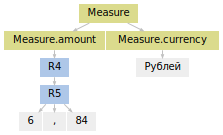

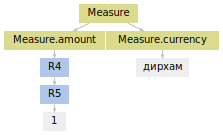

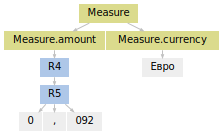

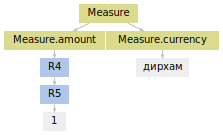

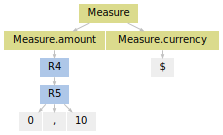

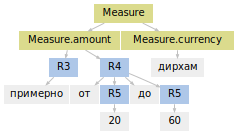

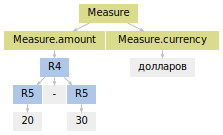

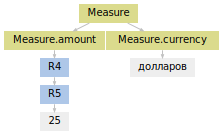

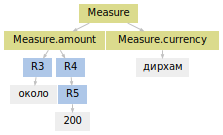

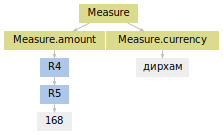

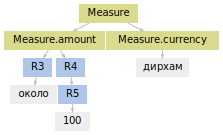

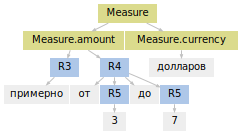

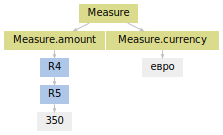

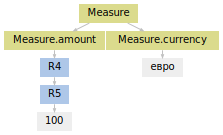

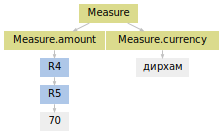

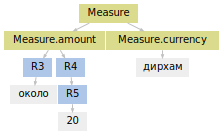

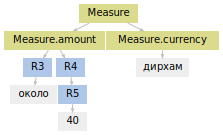

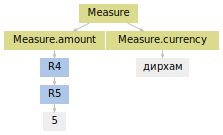

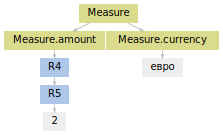

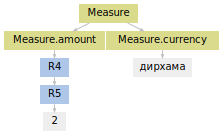

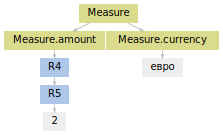

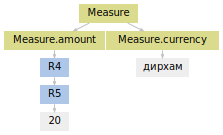

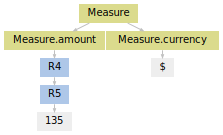

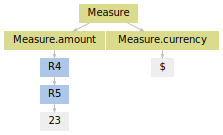

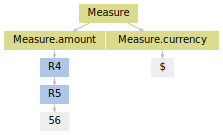

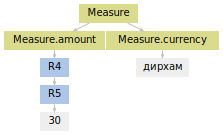

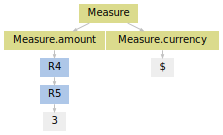

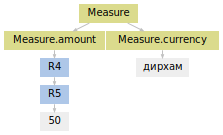

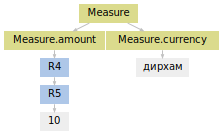

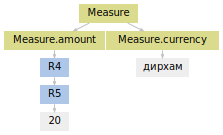

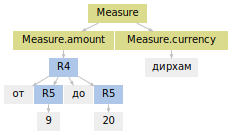

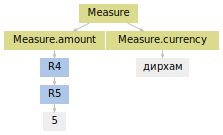

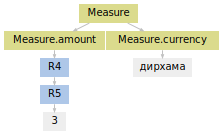

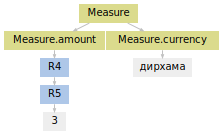

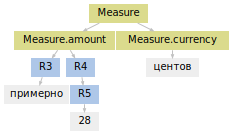

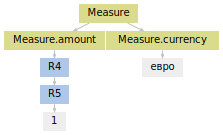

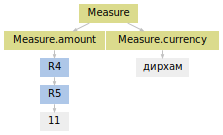

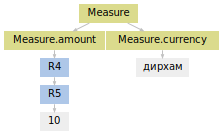

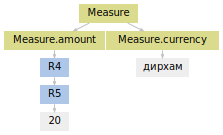

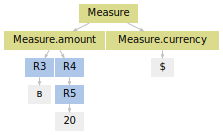

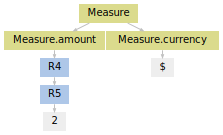

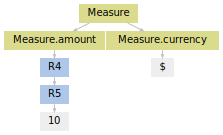

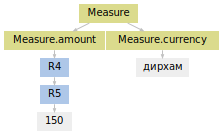

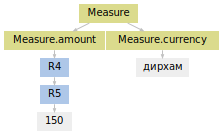

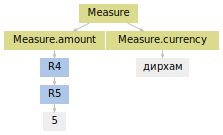

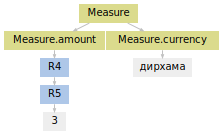

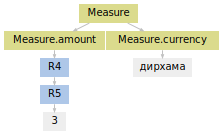

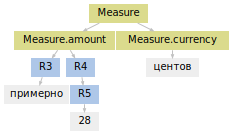

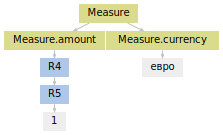

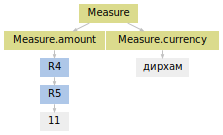

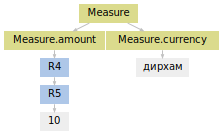

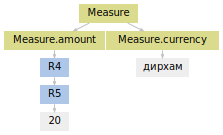

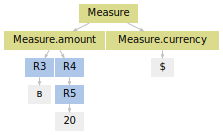

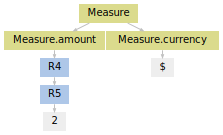

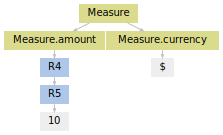

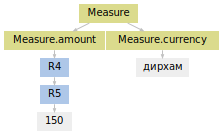

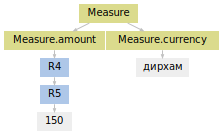

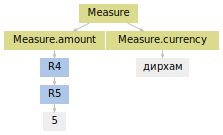

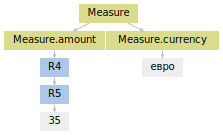

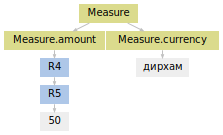

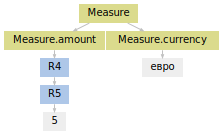

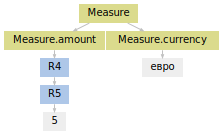

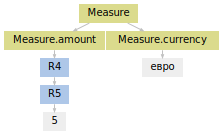

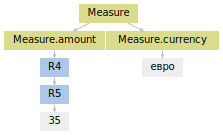

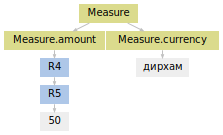

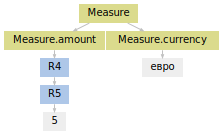

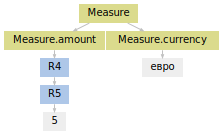

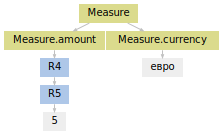

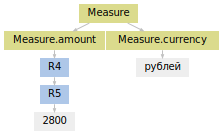

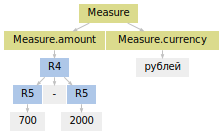

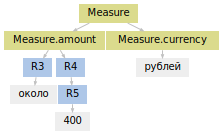

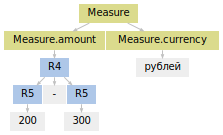

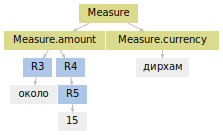

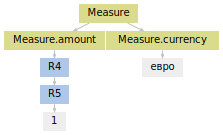

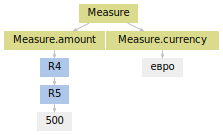

In [56]:
for match in matches:
    display(match.tree.as_dot)